<h1 style="background-color:#FF45D7; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Metadata
</h1>

<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Customer Data Base
</h2>

- *carID* - An attribute that contains an identifier for each car;
- *Brand* -  The car’s main brand (e.g. Ford, Toyota);
- *model* -  The car model;
- *year* -  The year of Registration of the Car;
- *mileage* - The total reported distance travelled by the car (inmiles);
- *tax* - The amount of road tax (in £) that, in 2020, wasapplicable to the car in question;
- *fuelType* - Type of Fuel used by the car (Diesel, Petrol, Hybrid,Electric);
- *mpg* - Average Miles per Gallon;
- *engineSize* - Size of Engine in liters (Cubic Decimeters);
- *paintQuality%* - The mechanic’s assessment of the cars’ overall paintquality and hull integrity (filled by the mechanicduring evaluation);
- *previousOwners* - Number of previous registered owners of the vehicle.
- *hasDamage* - Boolean marker filled by the seller at the time ofregistration stating whether the car is damaged or not;
- *price* The car’s price when purchased by Cars 4 You (in £);




In [363]:
from functions import *
%run functions.py

In [364]:
#general imports that we will need will almost always use - it is a good practice to import all libraries at the beginning of the notebook or script
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

# data partition
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import lasso_path, SGDRegressor


# embedded methods
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import TargetEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import ElasticNet
from sklearn.compose import TransformedTargetRegressor


#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)


In [365]:
# path to folder
df_train = pd.read_csv("project_data/train.csv", delimiter=',', header=0, decimal='.', quotechar='"')

In [366]:
#dividing into X and y, as well as validation set and training set
X_test = pd.read_csv("project_data/test.csv", delimiter=',', header=0, decimal='.', quotechar='"')


<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
1. Data Pre-processing and Cleaning
</h2>

<h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
.shape, .head() and .tail() visualizations
</h3>

In [367]:
df_train.shape, X_test.shape

((75973, 14), (32567, 13))

In [368]:
df_train.head() #Checking the first rows of the dataset df_train

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [369]:
X_test.head() #Checking the first rows of the dataset X_test

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [370]:
df_train.tail() #Checking the last rows of the dataset df_train

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
75968,37194,Mercedes,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.3,2.0,78.0,0.0,0.0
75969,6265,Audi,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.9,2.0,38.0,2.0,0.0
75970,54886,Toyota,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.0,1.0,57.0,3.0,0.0
75971,860,Audi,Q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.1,2.0,74.0,2.0,0.0
75972,15795,Ford,Fiesta,2018.0,10495,Manual,16709.0,Petro,145.0,64.2,1.1,38.0,1.0,0.0


In [371]:
X_test.tail() #Checking the last rows of the dataset X_test

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
32562,105775,VW,Tiguan,2017.0,Manual,27575.00000,Petrol,145.0,46.3,1.4,94.0,1.0,0.0
32563,81363,BMW,X2,2020.0,Automatic,1980.00000,Petrol,145.0,34.0,2.0,39.0,3.0,0.0
32564,76833,Audi,Q5,2019.0,Semi-Auto,8297.00000,Diesel,145.0,38.2,2.0,88.0,4.0,0.0
32565,91768,Mercedes,A Class,2019.0,Manual,-50755.21023,Petrol,145.0,28.5,1.3,81.0,1.0,0.0
32566,99627,Toyota,Yaris,2017.0,Automatic,11071.00000,Petrol,30.0,58.0,1.3,98.0,4.0,0.0


In [372]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
 Data types, duplicate/missing/unique values, typecasting, feature stats
</h3>

### **Data Types and Typecasting**

In [373]:
df_train.dtypes #Checking the datatypes of each feature in the dataset df_train

carID               int64
Brand              object
model              object
year              float64
price               int64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners    float64
hasDamage         float64
dtype: object

Removing `paintQuality%` because it is stated on the handout that no repair shop based features are allowed.

In [374]:
df_train.drop('paintQuality%', axis=1, inplace=True)
X_test.drop('paintQuality%', axis=1, inplace=True)

`year` should be a datetime object. `previousOwnwers` is also portrayed on the wrong data type, as it should be an Integer. The remainder seem to be correctly assigned

In [375]:
#correcting the data types
df_train['year']=pd.to_datetime(df_train['year'], format='%Y')
df_train["year"] = df_train["year"].dt.year
X_test['year']=pd.to_datetime(X_test['year'], format='%Y')
X_test["year"] = X_test["year"].dt.year

df_train['previousOwners'] = df_train['previousOwners'].apply(lambda x: int(x) if pd.notna(x) else x)
X_test['previousOwners'] = X_test['previousOwners'].apply(lambda x: int(x) if pd.notna(x) else x)

df_train['hasDamage'] = df_train['hasDamage'].apply(lambda x: False if pd.isna(x) else True)
X_test['hasDamage'] = X_test['hasDamage'].apply(lambda x: False if pd.isna(x) else True)


### **Missing Values**

In [376]:
df_train.replace("", np.nan, inplace=True) #Replacing empty strings with NaN values
df_train.isna().sum() #Checking the number of missing values in each feature of the dataset X

carID                0
Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
previousOwners    1550
hasDamage            0
dtype: int64

In [377]:
X_test.replace("", np.nan, inplace=True) #Replacing empty strings with NaN values
X_test.isna().sum() #Checking the number of missing values in each feature of the

carID                0
Brand              649
model              650
year               653
transmission       623
mileage            689
fuelType           656
tax               3308
mpg               3288
engineSize         628
previousOwners     597
hasDamage            0
dtype: int64

<span style="color:red">The missing values on all features have to be handled!</span>


### **Duplicated Values**

In [378]:
# checking if there are no duplicated IDs
df_train['carID'].nunique()
X_test['carID'].nunique()

32567

In [379]:
print("\nDuplicated values:", df_train.duplicated().sum())


Duplicated values: 0


In [380]:
print("\nDuplicated values:", X_test.duplicated().sum())



Duplicated values: 0


In [381]:
df_train.set_index('carID', inplace = True)
X_test.set_index('carID', inplace = True)

### **Numerical Variables Statistics**

In [382]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,74482.0,2017.091821,2.211113,1970.000000,2016.00,2017.0,2019.0,2024.0
price,75973.0,16881.889553,9736.926322,450.000000,10200.00,14699.0,20950.0,159999.0
mileage,74510.0,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.0
tax,68069.0,120.329078,65.521176,-91.121630,125.00,145.0,145.0,580.0
mpg,68047.0,55.152666,16.497837,-43.421768,46.30,54.3,62.8,470.8
engineSize,74457.0,1.660136,0.573462,-0.103493,1.20,1.6,2.0,6.6
previousOwners,74423.0,1.995042,1.464940,-2.000000,1.00,2.0,3.0,6.0


### **Categorical Features Unique Values**

Checking if all the unique values of the categorical features are appropriate.

In [383]:
for var in df_train.columns:
    if df_train[var].dtype == 'object':
        print(f"{var} unique values: {df_train[var].unique()} \n")

Brand unique values: ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot'] 

model unique values: [' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'
 ' 5 Series' ' Aygo' ' 4 Series' ' SLK' ' Viva' ' T-Roc' 'Focus'
 ' EcoSport' ' Tucson' ' EcoSpor' nan ' X-CLASS' ' CL Class' ' IX20'
 '

We observe that there are typos present on all categorical variables. We have to get them fixed in order to understand the data better and clear out inconsistencies.


In [384]:
for var in X_test.columns:
    if X_test[var].dtype == 'object':
        print(f"{var} unique values: {X_test[var].unique()} \n")

Brand unique values: ['Hyundai' 'VW' 'BMW' 'Opel' 'Ford' 'Mercedes' 'Skoda' 'Toyot' 'Toyota'
 'Audi' nan 'For' 'Ope' 'toyota' 'vw' 'hyundai' 'MW' 'SKODA' 'ord' 'udi'
 'bmw' 'V' 'BM' 'HYUNDAI' 'OPEL' 'mercedes' 'audi' 'Mercede' 'pel' 'opel'
 'FORD' 'yundai' 'ford' 'Aud' 'oyota' 'MERCEDES' 'ercedes' 'AUDI' 'koda'
 'Hyunda' 'W' 'skoda' 'Skod' 'ercede' 'TOYOTA' 'ERCEDES' 'kod' 'ORD' 'v'
 'ud' 'M' 'FOR' 'for' 'MERCEDE' 'YUNDAI' 'PEL' 'ope' 'or' 'TOYOT' 'hyunda'
 'oyot' 'UDI' 'mw' 'pe' 'bm'] 

model unique values: [' I30' ' Tiguan' ' 2 Series' ' Grandland X' '1 Series' ' Fiesta' ' X1'
 ' B Class' ' Focus' ' Superb' ' 5 Series' ' C Class' ' Up' ' Aygo' 'Golf'
 ' M CLAS' ' Land Cruiser' ' TT' ' Adam' ' Zafira' ' E Class' ' Golf'
 ' 3 Series' ' IX20' ' A4' ' Yaris' ' Passat' ' I10' ' Mokka X'
 ' EcoSport' ' 1 Series' ' 4 Series' ' A7' ' Corsa' ' Kuga' ' Grand C-MAX'
 ' Q2' ' M4' ' A Class' ' RAV4' ' Fabia' ' Insignia' ' A1' ' X6' ' Meriva'
 ' Caravelle' ' Octavia' ' Auris' ' X-CLASS' ' FOCUS' '

We designed a function to automatically correct the typos found in the training and test data set:

In [385]:
#correcting 'Brand' feature
valid_list = ["bmw", "mercedes", "ford", "hyundai", "audi", "toyota", "opel", "skoda", "vw"]
df_train["Brand"] = df_train["Brand"].apply(normalize_data)
df_train["Brand"] = df_train["Brand"].apply(lambda x: correct_missing_letters(x, valid_list))


X_test["Brand"] = X_test["Brand"].apply(normalize_data)
X_test["Brand"] = X_test["Brand"].apply(lambda x: correct_missing_letters(x, valid_list))

df_train[df_train["Brand"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan
X_test[X_test["Brand"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other", " None"])] = np.nan

print(df_train["Brand"].unique())



['vw' 'toyota' 'audi' 'ford' 'bmw' 'skoda' 'opel' 'mercedes' 'hyundai' nan]


In [386]:
#correcting 'fuelType' feature
valid_list = ["diesel", "petrol", "hybrid", "electric","other"]
df_train["fuelType"] = df_train["fuelType"].apply(normalize_data)
df_train["fuelType"] = df_train["fuelType"].apply(lambda x: correct_missing_letters(x, valid_list))

X_test["fuelType"] = X_test["fuelType"].apply(normalize_data)
X_test["fuelType"] = X_test["fuelType"].apply(lambda x: correct_missing_letters(x, valid_list))
X_test["fuelType"].unique()

df_train[df_train["fuelType"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan
X_test[X_test["fuelType"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan

print(df_train["fuelType"].unique())


['petrol' 'diesel' 'hybrid' nan 'other' 'electric']


In [387]:
#correcting 'model' feature
car_models = [
"GOLF", "POLO", "PASSAT", "TIGUAN", "TIGUANALLSPACE", "TOUAREG", "TROC", "TCROSS", "ARTEON",
"SHARAN", "JETTA", "CC", "CARAVELLE", "CALIFORNIA", "CADDY", "CADDYMAXI", "TOURAN", "GOLFSV",
"BEETLE", "SCIROCCO", "UP", "AMAROK", "EOS", "FOX", "FOCUS", "FIESTA", "MONDEO", "KUGA", "GALAXY",
"SMAX", "BMAX", "ECOSPORT", "PUMA", "TOURNEOCUSTOM", "TOURNEOCONNECT", "KA", "KAPLUS", "CMAX",
"GRANDCMAX", "EDGE", "MUSTANG", "GRANDTOURNEOCONNECT", "FUSION", "STREETKA", "RANGER", "ESCORT",
"CORSA", "ASTRA", "INSIGNIA", "MOKKA", "ZAFIRA", "VIVA", "MERIVA", "ADAM", "COMBOLIFE", "CROSSLANDX",
"GRANDLANDX", "GTC", "ANTARA", "VIVARO", "VECTRA", "AGILA", "TIGRA", "CASCADA", "AMPERA", "SERIES1",
"SERIES2", "SERIES3", "SERIES4", "SERIES5", "SERIES6", "SERIES7", "SERIES8", "X1", "X2", "X3", "X4",
"X5", "X6", "X7", "Z3", "Z4", "M2", "M3", "M4", "M5", "M6", "A1", "A2", "A3", "A4", "A5", "A6", "A7",
"A8", "Q2", "Q3", "Q5", "Q7", "Q8", "S3", "S4", "S5", "S8", "RS3", "RS4", "RS5", "RS6", "SQ5", "SQ7",
"TT", "R8", "ACLASS", "BCLASS", "CCLASS", "ECLASS", "SCLASS", "CLACLASS", "CLSCLASS", "GLACLASS",
"GLBCLASS", "GLCCLASS", "GLECLASS", "GLSCLASS", "GLCLASS", "GCLASS", "VCLASS", "XCLASS", "SLCLASS",
"SLKCLASS", "MCLASS", "CLK", "CLCLASS", "CLCCLASS", "MERCEDES200", "MERCEDES230", "MERCEDES220",
"YARIS", "AYGO", "COROLLA", "CHR", "AVENSIS", "PRIUS", "RAV4", "HILUX", "VERSO", "SUPRA",
"LANDCRUISER", "CAMRY", "PROACEVERSO", "URBANCRUISER", "AURIS", "GT86", "I10", "I20", "I30", "I40",
"I800", "IONIQ", "KONA", "TUCSON", "SANTAFE", "GETZ", "IX20", "IX35", "VELOSTER", "ACCENT",
"TERRACAN", "FABIA", "OCTAVIA", "SUPERB", "KAROQ", "KODIAQ", "KAMIQ", "YETI", "SCALA", "RAPID",
"CITIGO", "ROOMSTER", "LEON", "ATECA", "TOLEDO", "ARONA", "IBIZA", "ALHAMBRA", "SHUTTLE", "KADJAR", "IQ"
]

valid_list_models = [x.lower() for x in car_models]
df_train["model"] = df_train["model"].apply(normalize_data)
df_train["model"] = df_train["model"].apply(lambda x: correct_missing_letters(x, valid_list_models))
#df_train["models"].unique()
X_test["model"] = X_test["model"].apply(normalize_data)
X_test["model"] = X_test["model"].apply(lambda x: correct_missing_letters(x, valid_list_models))
X_test["model"].unique()

manual_corrections = {
    'ka+' : 'ka',
    'slk' : 'slkclass',
    '7series' : 'series7',
    '230' : 'mercedes230',
    'yetioutdoor' : 'yeti',
    'yetioutdoo' : 'yeti',
    'zafiratoure' : 'zafira',
    '220' : 'mercedes220',
    '6series' : 'series6',
    '4series' : 'series4',
    'zafiratourer' : 'zafira',
    '2series' : 'series2',
    '1serie' : 'series1',
    '1series' : 'series1',
    'rclass' : 'eclass',
    '7serie' : 'series7',
    '180' : 'mercedes200',
    'caddylife' : 'caddy',
    '5series' : 'series5',
    '5serie' : 'series5',
    '3series' : 'series3',
    '6serie' : 'series6',
    '3serie' : 'series3',
    '2serie' : 'series2',
    '4serie' : 'series4',
    '200' : 'mercedes200',
    'sl' : 'slclass',
    'transittourneo' : 'tourneoconnect',
    'amica' : 'agila',
    'mokkax' : 'mokka',
    'caddymaxilife' : 'caddymaxi',
    '8series' : 'series8',
    'versos' : 'verso',
    'caddymaxilif' : 'caddymaxi',
    '8serie' : 'series8',
    'rs7' : 'rs6',
    'slk': 'slc',
    'zafiratourer':'zafira'
}
df_train["model"] = df_train["model"].replace(manual_corrections)
X_test["model"] = X_test["model"].replace(manual_corrections)

df_train[df_train["model"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan
X_test[X_test["model"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan

In [388]:
#correcting 'transmission' feature

valid_list = ["automatic", "manual", "semiauto", 'unknown']
df_train["transmission"] = df_train["transmission"].apply(normalize_data)
df_train["transmission"] = df_train["transmission"].apply(lambda x: correct_missing_letters(x, valid_list))
df_train["transmission"].unique()

df_train.loc[df_train["transmission"].isin(["nan", "none", "null", "unknown", "UNKNOWN", "nknown", "nknow", "Other"]), "transmission"] = np.nan
X_test.loc[X_test["transmission"].isin(["nan", "none", "null", "unknown", "UNKNOWN", "nknown", "nknow", "Other"]), "transmission"] = np.nan



### **Numerical Features Unique Values**

Checking if all the unique values of the Numerical features are appropriate.

In [389]:
for var in df_train.columns:
    if df_train[var].dtype != 'object':
        print(f"{var} unique values: {df_train[var].unique()} \n")

year unique values: [2016. 2019. 2018. 2014. 2017. 2020. 2013.   nan 2015. 2023. 2011. 2012.
 2003. 2009. 2007. 2005. 2004. 2010. 2008. 2024. 2006. 2001. 2000. 2002.
 2022. 1996. 1998. 1970. 1999. 1997.] 

price unique values: [22290 13790 24990 ... 33606 16809 25785] 

mileage unique values: [28421.  4589.  3624. ... 13613. 52134. 69072.] 

tax unique values: [         nan 145.          30.          20.         150.
 160.         -56.19320154   0.         125.         200.
 250.         135.         300.         205.         260.
 326.02823317 325.         -45.78061049 265.         305.
 303.14889146 235.         299.47350391 240.         165.
 140.         540.         155.         220.         120.
 330.         290.48678508 -20.24107949 -18.33074314 327.91577835
 270.         115.         185.         316.48718937 570.
 -49.15354066 316.29630636 -60.6840948  555.         277.38425448
 -91.12163048  10.         315.         190.         -31.91494466
 230.         -43.24208237 294.84

For `tax` and `mileage` values below zero are inconsistent with the factual functioning of any car, thus we replace them with NaN to be further on inputed accordingly.

The thought process on the remaining three is equal, however the value zero is also removed.

In [390]:

df_train.loc[df_train["tax"] < 0, "tax"] = np.nan
df_train.loc[df_train["engineSize"] <= 0, "engineSize"] = np.nan
df_train.loc[df_train["mileage"] < 0, "mileage"] = np.nan
df_train.loc[df_train["mpg"] <= 0, "mpg"] = np.nan
df_train.loc[df_train["previousOwners"] <= 0, "previousOwners"] = np.nan

# Apply the same logic to the test set
X_test.loc[X_test["tax"] < 0, "tax"] = np.nan
X_test.loc[X_test["engineSize"] <= 0, "engineSize"] = np.nan
X_test.loc[X_test["mileage"] < 0, "mileage"] = np.nan
X_test.loc[X_test["mpg"] <= 0, "mpg"] = np.nan
X_test.loc[X_test["previousOwners"] <= 0, "previousOwners"] = np.nan

'hasDamage' is a dummy variable. For this reason, we will consider that the people who filled the spot on it's column are the ones with damage and the rest (NaNs) are cars not damaged.

In [391]:
df_train["has_reportedDamage"]=df_train["hasDamage"].map(lambda x: 1 if x==True else 0)
X_test["has_reportedDamage"]=X_test["hasDamage"].map(lambda x: 1 if x==True else 0)

# dropping the original 'hasDamage' column bc of redundancy
df_train.drop('hasDamage', axis=1, inplace=True)
X_test.drop('hasDamage', axis=1, inplace=True)


In [392]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75973 entries, 69512 to 15795
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               74452 non-null  object 
 1   model               74456 non-null  object 
 2   year                74482 non-null  float64
 3   price               75973 non-null  int64  
 4   transmission        73715 non-null  object 
 5   mileage             74141 non-null  float64
 6   fuelType            74462 non-null  object 
 7   tax                 67691 non-null  float64
 8   mpg                 68011 non-null  float64
 9   engineSize          74193 non-null  float64
 10  previousOwners      59173 non-null  float64
 11  has_reportedDamage  75973 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 7.5+ MB


### **Metric/Non-Metric Features**

Lets divide our features in numeric and non-numeric to treat them accordingly

In [393]:
cat_features=["Brand", "model", "fuelType", "transmission"]
metric_features=df_train.columns.drop(cat_features).tolist()

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75973 entries, 69512 to 15795
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               74452 non-null  object 
 1   model               74456 non-null  object 
 2   year                74482 non-null  float64
 3   price               75973 non-null  int64  
 4   transmission        73715 non-null  object 
 5   mileage             74141 non-null  float64
 6   fuelType            74462 non-null  object 
 7   tax                 67691 non-null  float64
 8   mpg                 68011 non-null  float64
 9   engineSize          74193 non-null  float64
 10  previousOwners      59173 non-null  float64
 11  has_reportedDamage  75973 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 7.5+ MB


<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
2. Data Understanding
</h2>

 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
 Individual Variable Analysis
 <h3>

### **Histograms**

We start plotting histograms of all the numerical features.

Text(0.5, 0.98, "Numeric Variables' Histograms")

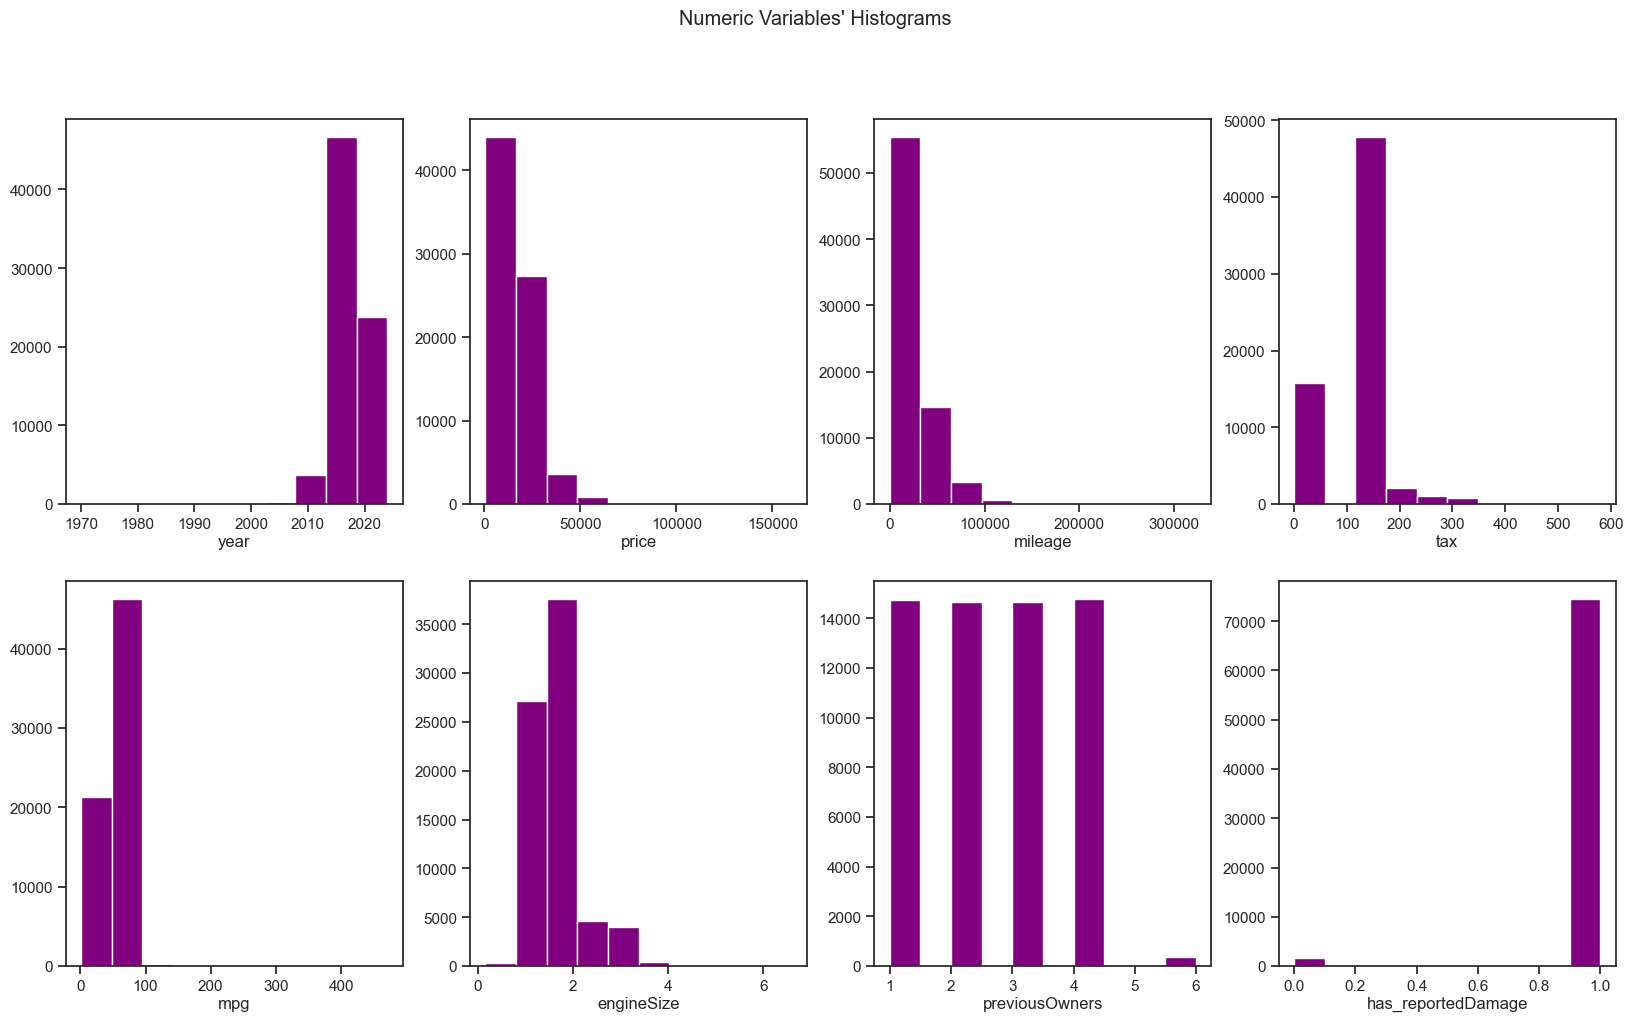

In [394]:
sp_rows = 2
sp_cols = 4


#Histograms
sns.set_style("ticks")
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(df_train[feat], color=("purple"))
    ax.set_title(feat, y=-0.13)  
# Layout
plt.suptitle("Numeric Variables' Histograms")

- `year`: a clear emphasis on recent years, with almost no variation on older cars;
- `price`: heavily right-skewed, we should also consider a log-transform;
- `mileage`: right-skewed tail, as well;
- `tax`: most data between [0,200], with large outlier presence;
- `mpg`: data concentrated below 100mpg;
- `engineSize`: most frequent values on [1,2]L, with obvious asymmetry;
- `previousOwners`: constant frequency on {1,2,3,4}, with larger value needing outlier analysis;
- `has_reportedDamage`: Almost all values 1 -> unbalanced.


### **Boxplot**

We can also plot the boxplot of all the numerical features.

Text(0.5, 0.98, 'BoxPlots')

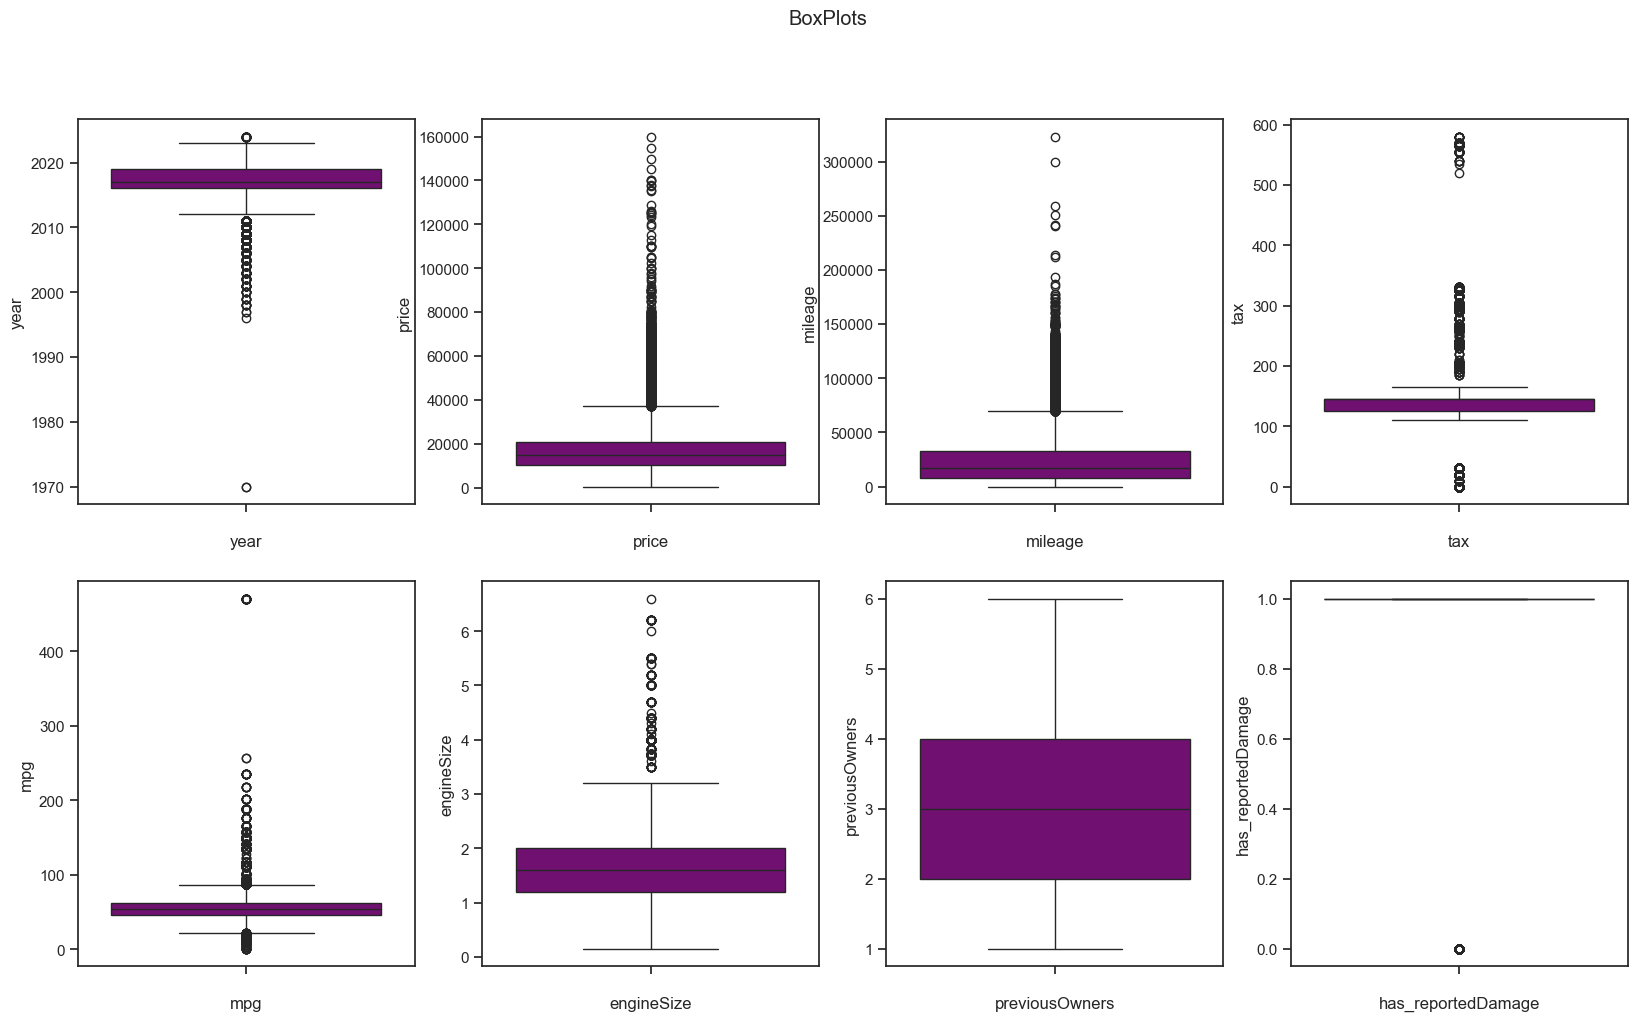

In [395]:
#boxplot
# Prepare figure. Create individual axes where each boxplot will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(y=df_train[feat],ax=ax, color=("purple"))
    ax.set_title(feat, y=-0.13) 

plt.suptitle("BoxPlots")



- `year`: huge presence of recent cars on the data. Outliers are mostly old cars.
- `price`, `engineSize` and `mileage`: tails that pull IQR up;
- `tax` and `mpg`: large outliers clearly separated from the rest;
- `previousOwners`: median value approximatly around 3.


### **BarPlot**

For categorical features we will observe them via a Bar Plot.

Text(0.5, 0.98, "Categorical Variables' Histplot")

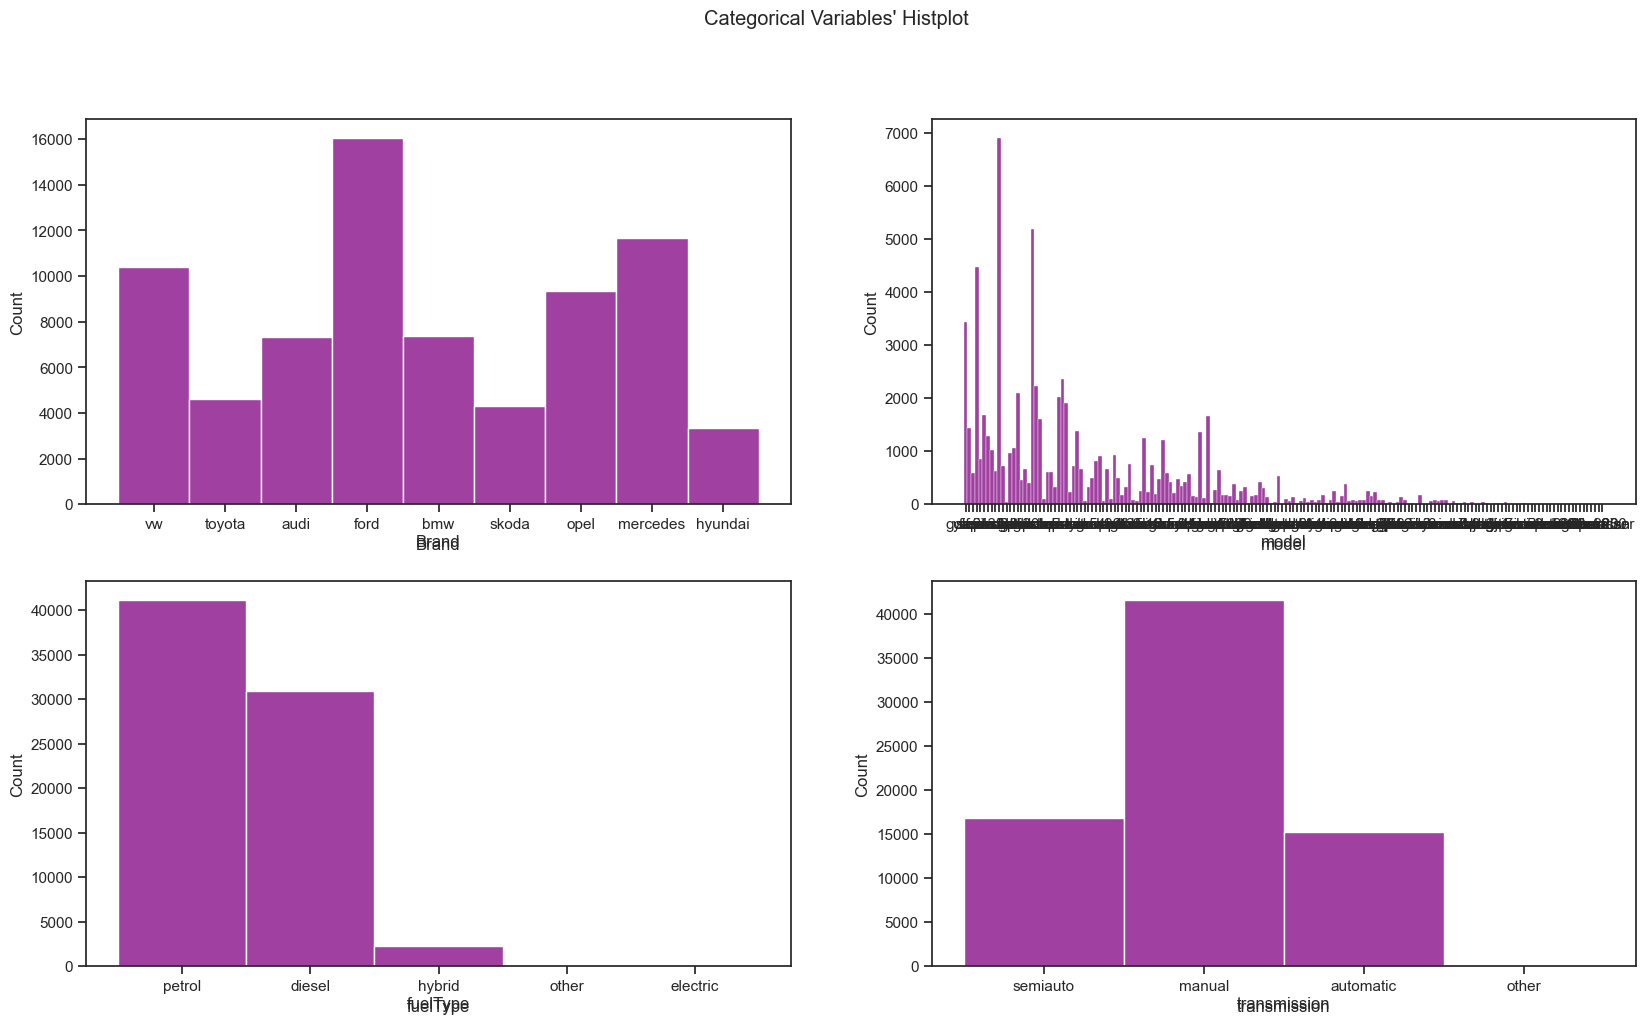

In [396]:
fig, axes = plt.subplots(2, 
                         2, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), cat_features): 
    sns.histplot(x=df_train[feat],ax=ax, color=("purple"))
    ax.set_title(feat, y=-0.13)



plt.suptitle("Categorical Variables' Histplot")

- `Brand`: most frequent car brands are ´ford´ and 'mercedes', although all brands seem represented in a balanced way;
- `model`: large number of unique models, where some have insignificant presence;
- `fuelType`: petrol is the most frequent fuel used;
- `transmission`: manual appears most frequently.

For better visualization plots we targetted important intervals.

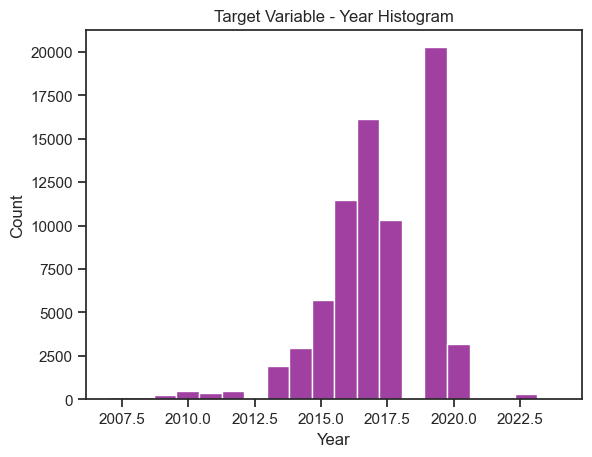

In [397]:
# Histogram of variable 'year' after 2007
sns.histplot(df_train[df_train["year"] >= 2007]["year"].astype(int), bins=20, color=("purple"))
plt.title("Target Variable - Year Histogram")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show() 

Plot of the `Year` histogram with focus on recent year for better viewing purpose.

 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Multivariate Analysis
<h3>

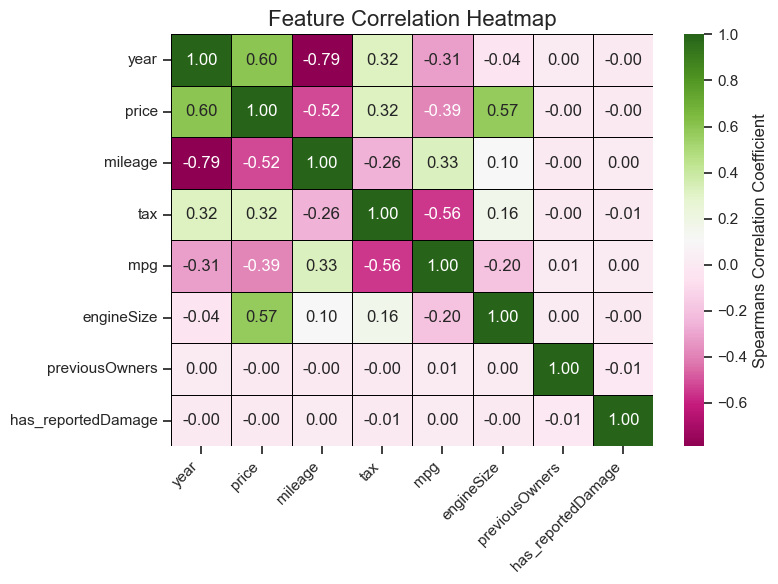

In [398]:
correlation_matrix_spearman = df_train[metric_features].corr(method='spearman')

plt.figure(figsize=(8, 6))

sns.heatmap(
    correlation_matrix_spearman,
    annot=True,     
    fmt=".2f",      
    cmap='PiYG',
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Spearmans Correlation Coefficient'}
)

plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Relationship with `price`
- **`year` ↗ `price` (ρ = 0.60)** → Newer cars tend to be more expensive.  
- **`mileage` ↘ `price` (ρ = -0.52)** → Cars with higher mileage usually have lower prices.  
- **`engineSize` ↗ `price` (ρ = 0.57)** → Larger engines are associated with higher prices.  
- **`mpg` ↘ `price` (ρ = -0.39)** → Cars with higher fuel efficiency are typically cheaper, possibly due to smaller engines or economy-focused models.  
- **`tax` ↗ `price` (ρ = 0.32)** → Higher tax values tend to correspond to higher-priced cars, likely reflecting larger or more powerful vehicles.

#### Relationships between predictors
- **`year` ↘ `mileage` (ρ = -0.79)** → Newer cars have lower mileage, a strong and expected inverse relationship.  
- **`tax` ↘ `mpg` (ρ = -0.56)** → Cars that consume less fuel (higher mpg) generally have lower taxes.  
- **`engineSize` ↗ `tax` (ρ = 0.16)** → Bigger engines tend to be associated with higher taxes.

#### Low-correlation or constant features
- **`paintQuality%`, `previousOwners`, `hasDamage`** show near-zero correlations with all other variables.  
  This could indicate:
  - Low variability or constant values in these columns, or  
  - Poor data quality (e.g., missing or improperly encoded values).

#### Key takeaways
- Strongest predictors of price: **`year`, `mileage`, and `engineSize`**.  
- Potentially irrelevant or flat features: **`paintQuality%`, `hasDamage`, and `previousOwners`** — these might be reviewed or excluded from feature selection.  
- The use of **Spearman’s rank correlation** was appropriate, as some relationships are **monotonic but not linear**.

---

By observing the Scatter Plot below we can assume these variables are strongly negatively correlated. On the other hand, for 'mileage' inferior to around 5000 (miles) we notice a large variation in 'price'.

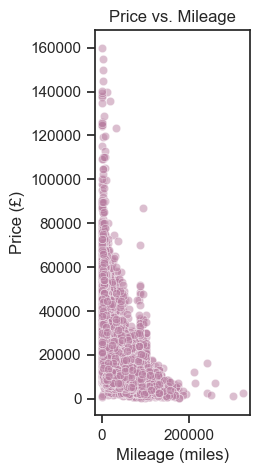

In [399]:
sns.set_style("ticks")


plt.figure(figsize=(2, 5))
sns.scatterplot(x='mileage', y='price', data=df_train, alpha=0.5, color="#B87EA1")
plt.title('Price vs. Mileage')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (£)')

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

We understand that these two features are positively correlated. The cars with the highest selling price are the most recent fabricated ones.

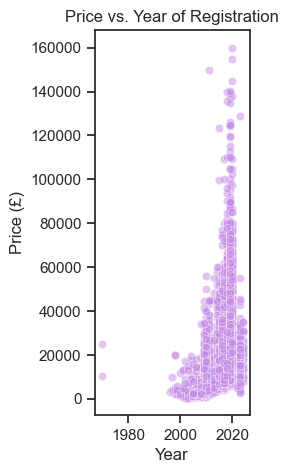

In [400]:
plt.figure(figsize=(2, 5))
sns.scatterplot(x='year', y='price', data=df_train, alpha=0.5, color='#C48AE6')
plt.title('Price vs. Year of Registration')
plt.xlabel('Year')
plt.ylabel('Price (£)')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

BMW and Mercedes have the highest median value, while VW and Audi have a large price range. Opel and Toyota appear to be the most accessible brands.

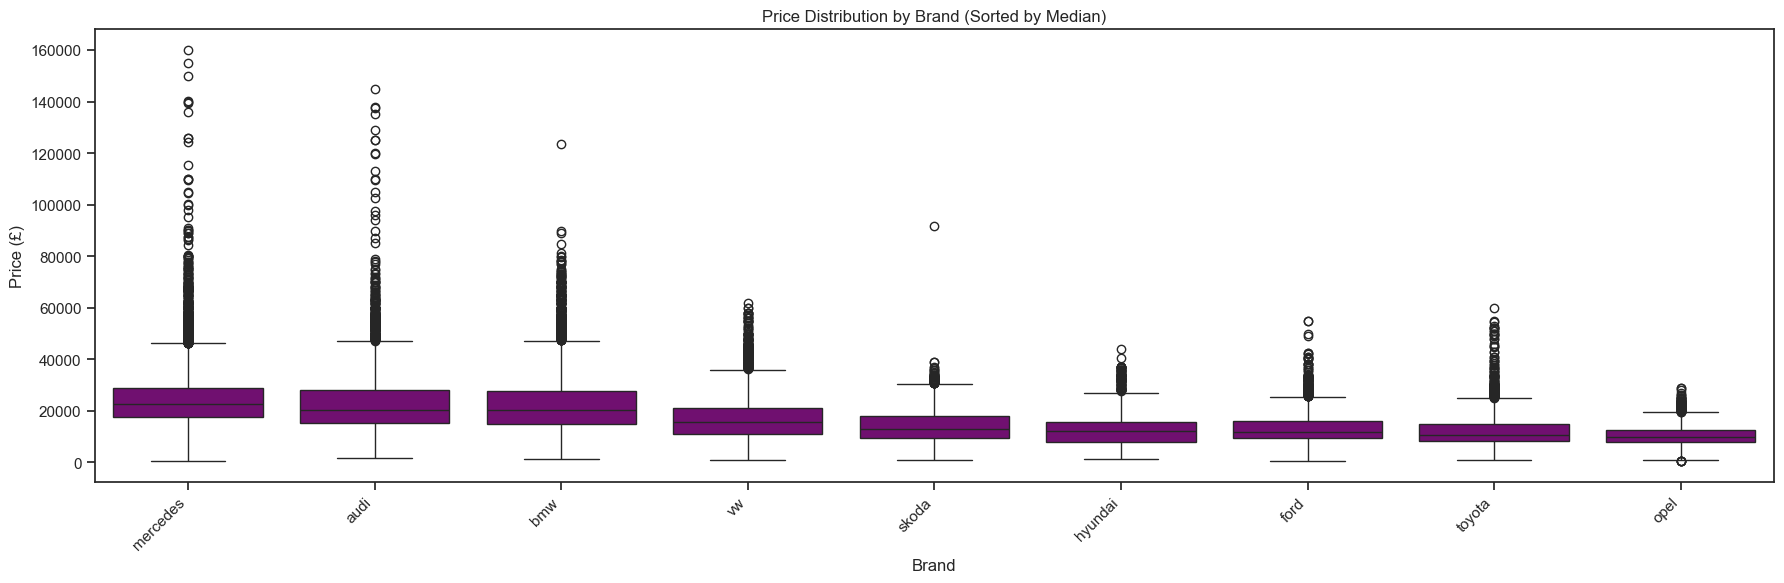

In [401]:
plt.figure(figsize=(18, 6))

median_price = df_train.groupby('Brand')['price'].median().sort_values(ascending=False)

sns.boxplot(x='Brand', y='price', data=df_train, order=median_price.index, color='purple')
plt.title('Price Distribution by Brand (Sorted by Median)')
plt.xlabel('Brand')
plt.ylabel('Price (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')

In [402]:
df_train.columns

Index(['Brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'previousOwners',
       'has_reportedDamage'],
      dtype='object')

In [403]:
X = df_train.drop('price', axis = 1)
y = df_train['price']
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)


metric_features.remove('price')
print(metric_features)

print(X_train.shape)
print(y_train.shape)


['year', 'mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'has_reportedDamage']
(53181, 11)
(53181,)


 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Outlier Analysis on Numerical Variables
<h3>

In [404]:
metric_features

['year',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'previousOwners',
 'has_reportedDamage']

### IQR

Checking outliers by the standard IQR analysis.

In [405]:

for col in metric_features:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    outliers = X_train[(X_train[col] < lower) | (X_train[col] > upper)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(X_train):.2%})")
    

year: 1183 outliers (2.22%)
mileage: 2262 outliers (4.25%)
tax: 13910 outliers (26.16%)
mpg: 841 outliers (1.58%)
engineSize: 439 outliers (0.83%)
previousOwners: 0 outliers (0.00%)
has_reportedDamage: 1071 outliers (2.01%)


In [406]:
X_train_treated, X_val_treated, X_test_treated, y_train_treated, y_val_treated = remove_outliers(
    X_train, X_val, X_test, y_train, y_val
)


[YEAR < 1990]
 0 train, 2 val, 0 test (→ NaN)

[MILEAGE]
 P99 = 85,455 milhas
 Capped: 1010 train, 450 val, 635 test

[MPG]
 [22.1, 80.7] MPG (0.5%–98%)
  1159 train, 445 val, 710 test

[TAX]
  P98 = £260
  Capped: 767 train, 318 val, 478 test

[ENGINE SIZE]
 Engine > 6.0L: 184 train, 90 val, 104 test (→ NaN)

[Logic Validation]
 large engine + high mpg: 1 train, 0 val, 0 test (→ NaN)

Mantidos: 53181 train (100.0%), 22792 val (100.0%), 32567 test (100.0%)
Nenhuma linha removida - valores impossíveis substituídos por NaN



Correcting the dataset  with the outlier treatment.

In [407]:
X_train=X_train_treated
X_val=X_val_treated
y_train=y_train_treated
y_val=y_val_treated
X_test=X_test_treated

 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Missing Values Treatment
 <h3>

In [408]:
#slight correction of NaN values that werent marked as real NaN
for df in [X_train, X_val, X_test]:
    df.replace(["nan", "NaN", "None", "", " "], np.nan, inplace=True)

In [409]:
X_train_clean, X_val_clean, X_test_clean = impute_missing_values_hybrid(
    X_train, X_val, X_test
)

HYBRID IMPUTATION PIPELINE

[1/6] MODEL - brand-aware mode + global fallback
  Global mode: 'focus'
  Imputed - Train: 1054, Val: 463, Test: 650

[2/6] BRAND - inferred from model + learned mapping
  Learned mapping: 168 models
  Imputed - Train: 1071, Val: 450, Test: 649

[3/6] FUELTYPE & TRANSMISSION - mode by group
  fuelType imputed - Train: 1034
  transmission imputed - Train: 1599

[3.5/6] BINARY FLAGS - has_reported_damage

[4/6] SYNCHRONIZATION - force known categorical values
  model - Val: 4 unknown values -> 'focus'
  model - Test: 4 unknown values -> 'focus'
  transmission - Test: 31119 unknown values -> 'manual'

[5/6] NUMERICAL - IterativeImputer (MICE)
  Columns to impute: ['year', 'engineSize', 'mileage', 'mpg', 'tax', 'previousOwners']
  IterativeImputer applied successfully

[6/6] VALIDATION - checking logical limits
  Limits applied

IMPUTATION COMPLETED

Final missing values:
  Train: 0
  Val:   0
  Test:  0


In [410]:
print(X_train_clean.isna().sum())
print(X_val_clean.isna().sum())
print(X_test_clean.isna().sum())


Brand                 0
model                 0
year                  0
transmission          0
mileage               0
fuelType              0
tax                   0
mpg                   0
engineSize            0
previousOwners        0
has_reportedDamage    0
dtype: int64
Brand                 0
model                 0
year                  0
transmission          0
mileage               0
fuelType              0
tax                   0
mpg                   0
engineSize            0
previousOwners        0
has_reportedDamage    0
dtype: int64
Brand                 0
model                 0
year                  0
transmission          0
mileage               0
fuelType              0
tax                   0
mpg                   0
engineSize            0
previousOwners        0
has_reportedDamage    0
dtype: int64


In [411]:
X_train=X_train_clean
X_val=X_val_clean
X_test=X_test_clean

<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
3. Feature Engineering
</h2>

'car_age': represents how old the car is.

In [412]:
X_train['car_age']=2025-X_train['year']
X_val['car_age']=2025-X_val['year']
X_test['car_age']=2025-X_test['year']

'mileage_per_year': normalises car usage per year.

In [413]:
X_train['mileage_per_year'] = X_train['mileage'] / (X_train['car_age'] + 1)
X_val['mileage_per_year'] = X_val['mileage'] / (X_val['car_age'] + 1)
X_test['mileage_per_year'] = X_test['mileage'] / (X_test['car_age'] + 1)

'is_eco': dummy variable representing if a car is environmentally friendly.

In [414]:
eco_fuels = ['electric', 'hybrid']
X_train['is_eco'] = X_train['fuelType'].str.lower().isin(eco_fuels).astype(int)
X_val['is_eco'] = X_val['fuelType'].str.lower().isin(eco_fuels).astype(int)
X_test['is_eco'] = X_test['fuelType'].str.lower().isin(eco_fuels).astype(int)


'is_luxury': dummy variable that highligths more expensive brands.

In [415]:
luxury_brands = ["bmw", "audi", "mercedes"]
X_train["is_luxury"] = X_train["Brand"].str.lower().isin(luxury_brands).astype(int)
X_val["is_luxury"] = X_val["Brand"].str.lower().isin(luxury_brands).astype(int)
X_test["is_luxury"] = X_test["Brand"].str.lower().isin(luxury_brands).astype(int)

'mileage_bin': mileage discretized into five intervals representing typical usage stages.

In [416]:
mileage_bins = [0, 10000, 50000, 100000, 150000, np.inf]
mileage_labels = ['0-10k', '10k-50k', '50k-100k', '100k-150k', '150k+']

X_train['mileage_bin'] = pd.cut(
    X_train['mileage'], bins=mileage_bins, labels=mileage_labels, include_lowest=True
)
X_val['mileage_bin'] = pd.cut(
    X_val['mileage'], bins=mileage_bins, labels=mileage_labels, include_lowest=True
)

X_test['mileage_bin'] = pd.cut(
    X_test['mileage'], bins=mileage_bins, labels=mileage_labels, include_lowest=True
)

'tax_to_engine_ratio': proxy for energy efficiency check

In [417]:
X_train["tax_to_engine_ratio"] = X_train["tax"] / X_train["engineSize"].replace(0, np.nan)
X_val["tax_to_engine_ratio"] = X_val["tax"] / X_val["engineSize"].replace(0, np.nan)
X_test["tax_to_engine_ratio"] = X_test["tax"] / X_test["engineSize"].replace(0, np.nan)

<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
4. Feature Selection
</h2>

We define a new object named a `X_train_num` where only the numerical variables are mantained, and a object named as `X_train_cat` with all the categorical independent variables.

In [418]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)


# Repeat for Validation
X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

# Repeat for Test
X_test_num = X_test.select_dtypes(include=np.number).set_index(X_test.index)
X_test_cat = X_test.select_dtypes(exclude=np.number).set_index(X_test.index)

# Update metric features
cat_features=cat_features+['mileage_bin']
metric_features=X_train.columns.drop(cat_features).tolist()
print(metric_features)

['year', 'mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'has_reportedDamage', 'car_age', 'mileage_per_year', 'is_eco', 'is_luxury', 'tax_to_engine_ratio']


Which scale to use?

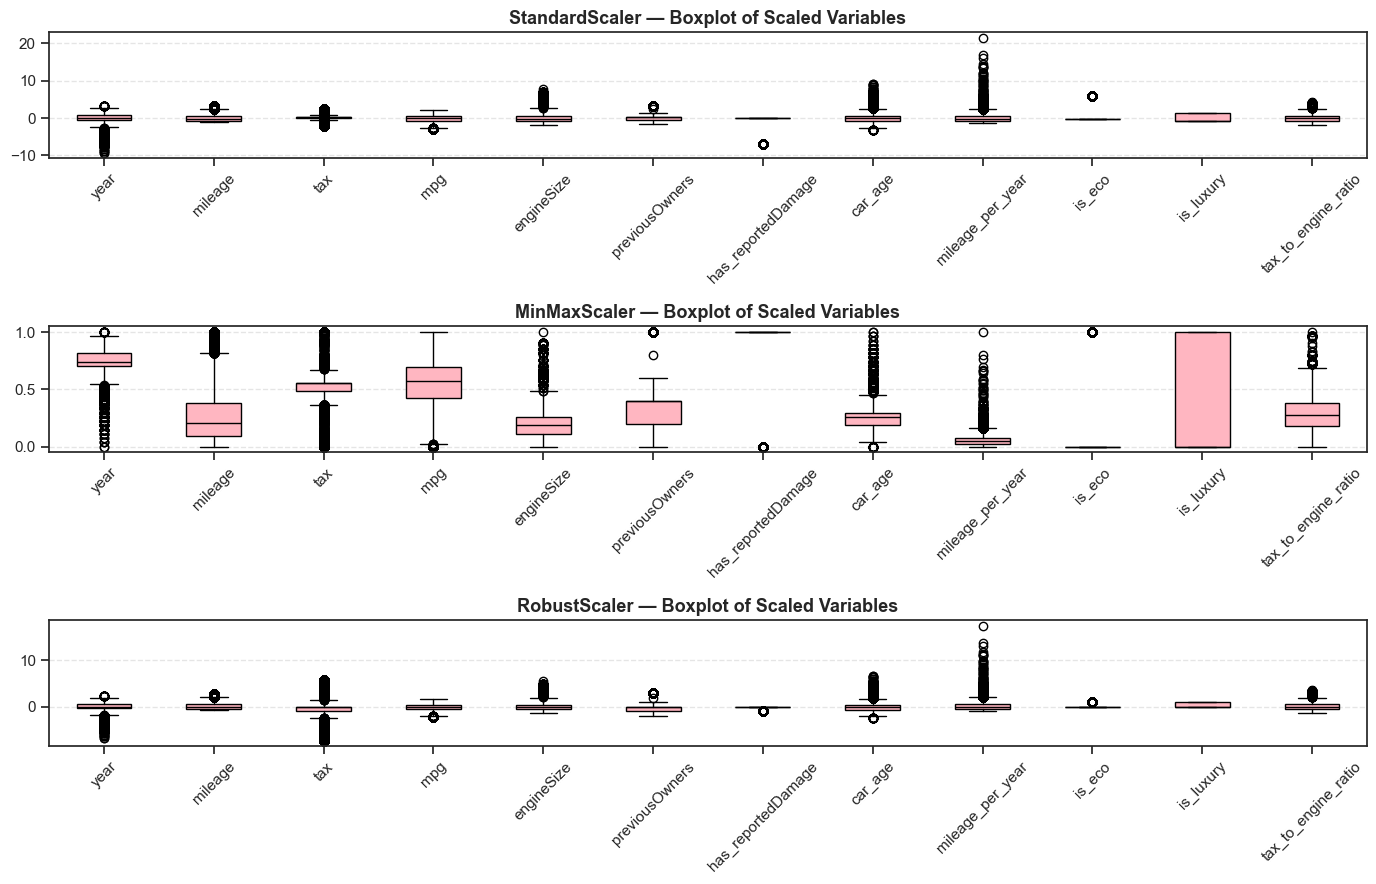

In [419]:
sns.set_style('ticks')

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 9))

if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]

for ax, (name, scaler) in zip(axes, scalers.items()):
    scaled = scaler.fit_transform(X_train_num)
    df_scaled = pd.DataFrame(scaled, columns=X_train_num.columns, index=X_train_num.index)

    ax.boxplot(
        df_scaled.values,
        labels=df_scaled.columns,
        patch_artist=True,  
        boxprops=dict(facecolor="#FFB6C1", color="black"),  
        medianprops=dict(color="black"),                   
        whiskerprops=dict(color="black"),                  
        capprops=dict(color="black")                       
    )
    ax.set_title(f"{name} — Boxplot of Scaled Variables", fontsize=13, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


After comparing the results of different scaling methods through boxplots, the **RobustScaler** was selected as the most appropriate transformation for the project.

As shown in the visual comparison, MinMaxScaler compresses most variables towards the lower end of the scale (0–1 range) due to the presence of strong outliers, which distorts the original data distribution. In contrast, StandardScaler standardizes each feature by removing the mean and scaling to unit variance, by the representation the data seems distorted by its' extreme values.


In [420]:
#call function
scaler = RobustScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

#show results
X_train_num_scaled

array([[ 0.66666667, -0.59643287,  0.        , ...,  0.        ,
         1.        ,  0.39224138],
       [ 0.        ,  0.07486974, -6.25      , ...,  0.        ,
         0.        , -1.09913793],
       [ 0.66666667, -0.56621242,  0.        , ...,  0.        ,
         0.        , -0.04525862],
       ...,
       [-0.33333333,  1.78533066, -1.        , ...,  0.        ,
         0.        , -0.2262931 ],
       [-0.33333333,  0.59599198, -6.25      , ...,  0.        ,
         0.        , -0.99568966],
       [ 0.66666667, -0.50837675,  0.        , ...,  0.        ,
         0.        ,  1.26724138]])

In [421]:
# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled

,year,mileage,tax,mpg,engineSize,previousOwners,has_reportedDamage,car_age,mileage_per_year,is_eco,is_luxury,tax_to_engine_ratio
carID,,,,,,,,,,,,
46299,0.666667,-0.596433,0.000000,-0.623158,-0.125,-1.0,0.0,-0.666667,-0.698484,0.0,1.0,0.392241
69620,0.000000,0.074870,-6.250000,0.381525,-0.250,-2.0,0.0,0.000000,0.061029,0.0,0.0,-1.099138
68925,0.666667,-0.566212,0.000000,-0.991966,0.500,-1.0,0.0,-0.666667,-0.652504,0.0,0.0,-0.045259
40663,-0.333333,1.676713,-6.090897,0.373487,0.500,-1.0,0.0,0.333333,1.675410,1.0,1.0,-1.147921
25370,1.000000,-0.695631,0.242718,-0.010617,-0.750,-1.0,0.0,-1.000000,-0.848397,0.0,0.0,1.355122
...,...,...,...,...,...,...,...,...,...,...,...,...
41593,0.666667,-0.552625,0.052950,-1.624921,1.750,1.0,0.0,-0.666667,-0.631831,0.0,1.0,-0.476368
19620,0.666667,-0.236353,0.000000,-1.125500,0.500,-1.0,0.0,-0.666667,-0.150625,0.0,0.0,-0.045259
66650,-0.333333,1.785331,-1.000000,0.222557,0.500,1.0,0.0,0.333333,1.791092,0.0,0.0,-0.226293


The scaling of the validation/test set should only consider information gained from the training data. 

In [422]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_scaled.head()

X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns).set_index(X_test.index)
X_test_num_scaled.head()

,year,mileage,tax,mpg,engineSize,previousOwners,has_reportedDamage,car_age,mileage_per_year,is_eco,is_luxury,tax_to_engine_ratio
carID,,,,,,,,,,,,
89856,1.666667,0.530822,3.00,-0.883867,0.000,0.0,0.0,-1.666667,2.420728,0.0,0.0,0.961746
106581,0.000000,0.150329,0.25,-1.093706,0.500,-1.0,0.0,0.000000,0.150326,0.0,0.0,0.000000
80886,-0.333333,0.774990,-1.00,-0.254350,-0.125,-1.0,0.0,0.333333,0.715034,0.0,1.0,0.150862
100174,0.666667,-0.477876,0.00,-0.718540,-0.500,-2.0,0.0,-0.666667,-0.518100,0.0,0.0,0.829741
81376,0.666667,-0.336593,0.25,-0.254350,0.500,1.0,0.0,-0.666667,-0.303140,0.0,1.0,0.000000


 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Categorical Variables Selection
 <h3>

In [423]:
X_train_cat.columns

Index(['Brand', 'model', 'transmission', 'fuelType', 'mileage_bin'], dtype='object')

Next step is encoding the categorical variables so they can be read by our models. For features with high cardinality, Target Encoding will be used. As for all others, OneHotEncoder should work fine and not weight the dataset with unnecessary new variables for each unique value.

In [424]:
low_card_features = ['transmission', 'fuelType', 'mileage_bin']
high_card_features = ['Brand','model']

# ONE-HOT ENCODING
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform
ohe_train = ohe.fit_transform(X_train_cat[low_card_features])
ohe_val = ohe.transform(X_val_cat[low_card_features])
ohe_test = ohe.transform(X_test_cat[low_card_features])

# DataFrames
ohe_columns = ohe.get_feature_names_out(low_card_features)
ohe_train_df = pd.DataFrame(ohe_train, columns=ohe_columns, index=X_train_cat.index)
ohe_val_df = pd.DataFrame(ohe_val, columns=ohe_columns, index=X_val_cat.index)
ohe_test_df = pd.DataFrame(ohe_test, columns=ohe_columns, index=X_test_cat.index)


# TARGET ENCODING
te = TargetEncoder(smooth=12, target_type="continuous")

# 'Brand'
te_train_brand = te.fit_transform(X_train_cat[['Brand']], y_train)
te_val_brand = te.transform(X_val_cat[['Brand']])
te_test_brand = te.transform(X_test_cat[['Brand']])

# Dataframes
te_train_df = pd.DataFrame(te_train_brand, columns=['Brand_Encoded'], index=X_train_cat.index)
te_val_df = pd.DataFrame(te_val_brand, columns=['Brand_Encoded'], index=X_val_cat.index)
te_test_df = pd.DataFrame(te_test_brand, columns=['Brand_Encoded'], index=X_test_cat.index)


# 'model'
te_model = TargetEncoder(smooth=50, target_type="continuous") #higher smoothing due to high cardinality
te_train_model = te_model.fit_transform(X_train_cat[['model']], y_train)
te_val_model = te_model.transform(X_val_cat[['model']])
te_test_model = te_model.transform(X_test_cat[['model']])

# Dataframes
te_train_model_df = pd.DataFrame(te_train_model, columns=['model_Encoded'], index=X_train_cat.index)
te_val_model_df = pd.DataFrame(te_val_model, columns=['model_Encoded'], index=X_val_cat.index)
te_test_model_df = pd.DataFrame(te_test_model, columns=['model_Encoded'], index=X_test_cat.index)

# joining all encoded categorical features
X_train_cat_encoded = pd.concat([ohe_train_df, te_train_df, te_train_model_df], axis=1)
X_val_cat_encoded = pd.concat([ohe_val_df, te_val_df, te_val_model_df], axis=1)
X_test_cat_encoded = pd.concat([ohe_test_df, te_test_df, te_test_model_df], axis=1)



Concatenating all treated features in one final dataframe.

In [425]:
X_train_final = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_val_final = pd.concat([X_val_num_scaled, X_val_cat_encoded], axis=1)
X_test_final = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

### **Chi-Squared Test**

Now we will begin analysing feature importance.

In [426]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

Brand is IMPORTANT for Prediction
model is IMPORTANT for Prediction
transmission is IMPORTANT for Prediction
fuelType is NOT an important predictor. (Discard fuelType from model)
mileage_bin is IMPORTANT for Prediction


According to chi-square, we should not discard any variable.

 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Numerical Variables Selection
 <h3>

### **Correlations**

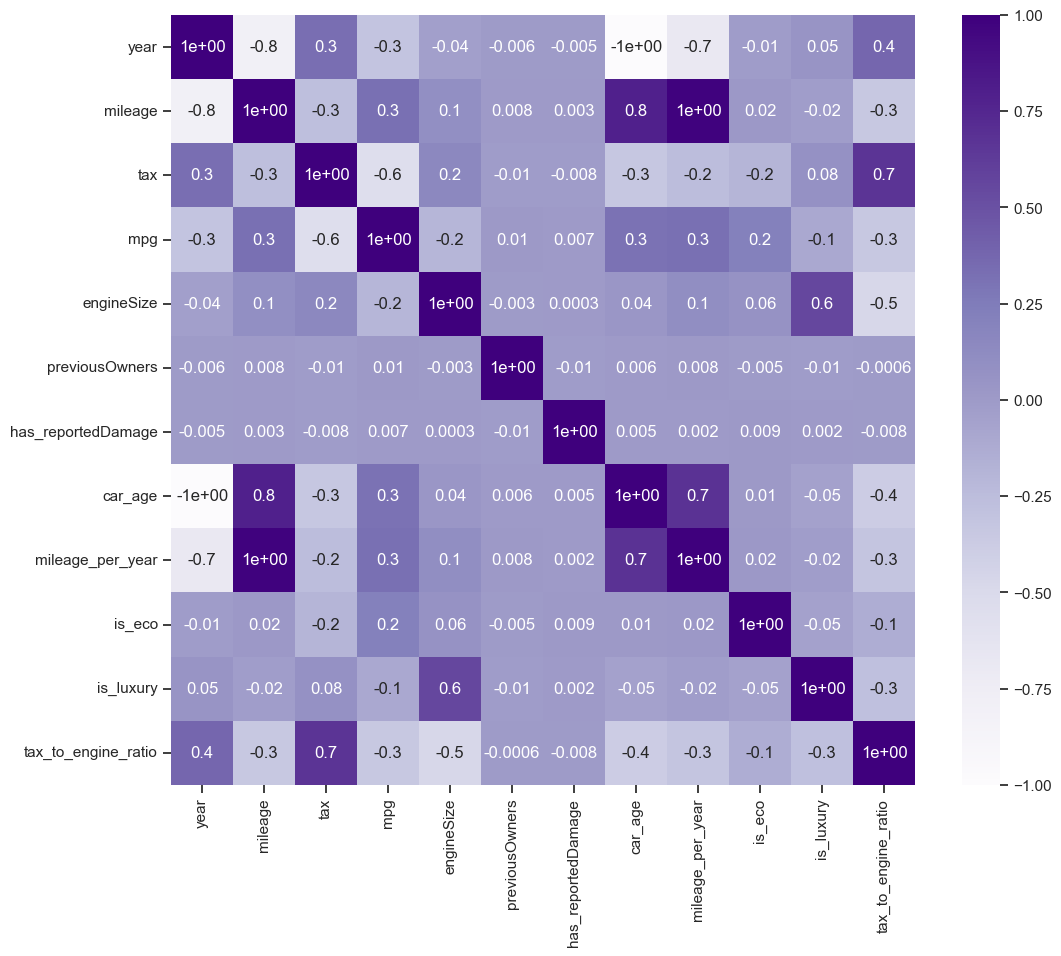

In [427]:
cor_spearman = X_train_num_scaled.corr(method ='spearman')
cor_heatmap(cor_spearman)

We can conclude that:
- We need to use other feature selection techniques to get more insights.
- There are three pairs of variables highly correlated, namely:
    - 'mileage' vs 'car_age' (0.8) <br>
    - 'mileage_per_year' vs 'car_age' (0.7) <br>
    - 'mileage' vs 'year' (-0.8) <br>
    - 'mileage_per_year' vs 'year' (-0.7) <br>
    - 'tax' vs 'tax_engine_ratio' (0.7) <br>

### **RFE**

In [428]:
y_train_log=np.log(y_train)
y_val_log=np.log(y_val)

Before RFE, we will check if the training and validation instances of the target variable are similiar in statistical metrics. If they behave in close proximity it means the predictions are reasonable.

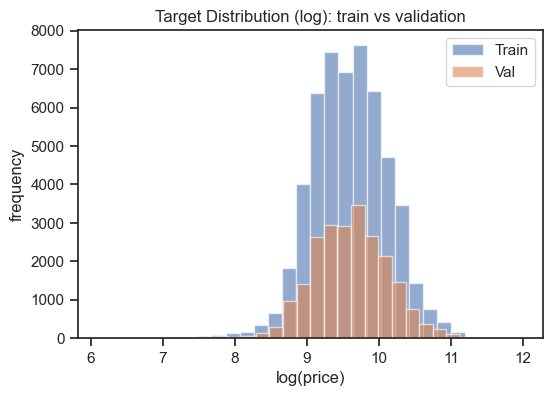

In [429]:
plt.figure(figsize=(6,4))
plt.hist(np.log(y_train), bins=30, alpha=0.6, label="Train")
plt.hist(np.log(y_val), bins=30, alpha=0.6, label="Val")
plt.legend()
plt.title("Target Distribution (log): train vs validation")
plt.xlabel("log(price)")
plt.ylabel("frequency")
plt.show()

This plot shows the distribution of the logarithm of car prices (`log(price)`) for both the training and validation sets. After applying the logarithmic transformation, the target variable follows an approximately normal distribution, which confirms that the transformation successfully reduced the original right skewness typical of raw price data. Both the train and validation sets exhibit very similar shapes and ranges, suggesting that the data split preserved the underlying price distribution, a good sign for model generalization. The concentration of most values between `log(price)` ~ 8.5 and 10.5 indicates that the majority of cars are within a consistent mid-range price segment, while very cheap or very expensive cars are rare.

We tried RFECV and normal RFE for the following results:

In [430]:
#no of features
nof_list=np.arange(1,len(X_train_num_scaled.columns)+1)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LinearRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train_log)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train_log)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train_log)
    train_score_list.append(train_score)
    
    #storing results on validation data
    val_score = model.score(X_val_rfe,y_val_log)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.815253


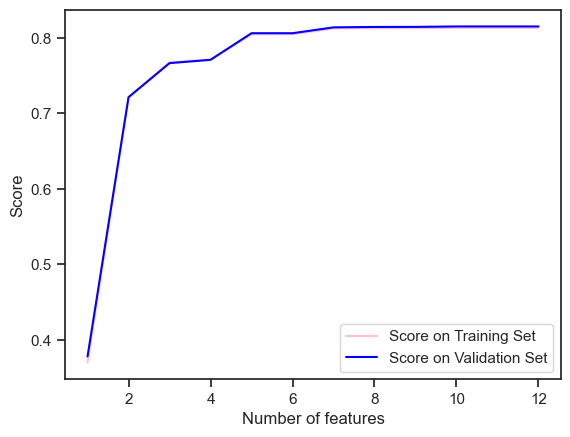

In [431]:
xs = range(1, len(train_score_list) + 1)
plt.plot(xs, train_score_list, label="Score on Training Set", color="pink")
plt.plot(xs, val_score_list, label="Score on Validation Set", color="blue")
plt.xlabel("Number of features")
plt.ylabel("Score")
plt.legend()


In [432]:
rfe = RFE(estimator = model, n_features_to_select = 11)
X_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)
rfe.ranking_

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1])

In [433]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

year                    True
mileage                 True
tax                     True
mpg                     True
engineSize              True
previousOwners         False
has_reportedDamage      True
car_age                 True
mileage_per_year        True
is_eco                  True
is_luxury               True
tax_to_engine_ratio     True
dtype: bool

### **LASSO**

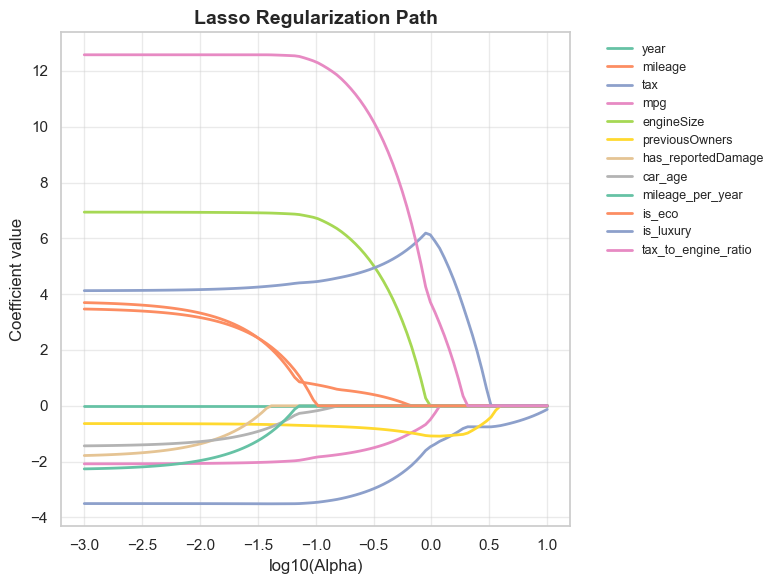

In [434]:
sns.set_theme(style="whitegrid")

alphas, coefs, _ = lasso_path(X_train_num_scaled, y_train_log, alphas=np.logspace(-3, 1, 100))

palette = sns.color_palette("Set2", n_colors=len(X_train_num_scaled.columns))

plt.figure(figsize=(8,6))
for i, (col, color) in enumerate(zip(X_train_num_scaled.columns, palette)):
    plt.plot(np.log10(alphas), coefs[i], label=col, color=color, linewidth=2)

plt.xlabel('log10(Alpha)', fontsize=12)
plt.ylabel('Coefficient value', fontsize=12)
plt.title('Lasso Regularization Path', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, frameon=False)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

When α is small, most coefficients are non-zero, meaning that the model includes almost all variables. As α increases, the L1 penalty forces less relevant or redundant variables to shrink toward zero, progressively simplifying the model.

In this case, the first features to be eliminated are those with weaker relationships to the target, such as `paintQuality%`, `previousOwners`, and `hasDamage`.
Conversely, the most persistent variables (`year`, `engineSize`, and `is_luxury`) remain active for a wide range of α values, indicating that they are the strongest predictors of car price.

In [435]:
reg=LassoCV()

In [436]:
reg.fit(X_train_num_scaled, y_train_log)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,None
,verbose,False
,n_jobs,None


In [437]:
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
coef

year                   0.335493
mileage               -0.105396
tax                    0.011348
mpg                   -0.066280
engineSize             0.301748
previousOwners        -0.000000
has_reportedDamage     0.000000
car_age               -0.006890
mileage_per_year      -0.039414
is_eco                 0.275702
is_luxury              0.300379
tax_to_engine_ratio   -0.044740
dtype: float64

In [438]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 2 variables


In [439]:
coef.sort_values()

mileage               -0.105396
mpg                   -0.066280
tax_to_engine_ratio   -0.044740
mileage_per_year      -0.039414
car_age               -0.006890
previousOwners        -0.000000
has_reportedDamage     0.000000
tax                    0.011348
is_eco                 0.275702
is_luxury              0.300379
engineSize             0.301748
year                   0.335493
dtype: float64

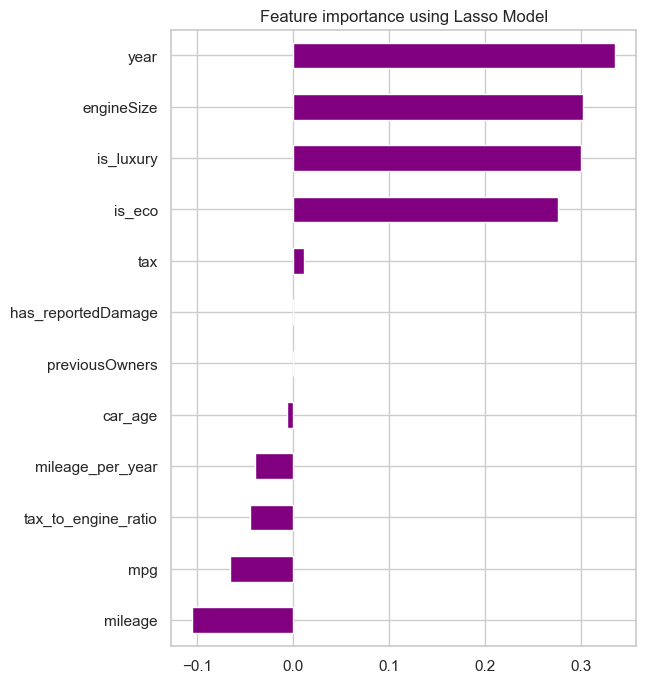

In [440]:
plot_importance(coef,'Lasso')

According to Lasso, we should remove `has_reportedDamage` and `tax` (**coefficient == 0**). Furthermore, `previousOwners` and `car_age` seem less important than the remaining predictors.

In [441]:
metric_features

['year',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'previousOwners',
 'has_reportedDamage',
 'car_age',
 'mileage_per_year',
 'is_eco',
 'is_luxury',
 'tax_to_engine_ratio']

### **Regression Tree Feature Importance**

Shape do X_train[metric_features]: (53181, 12)


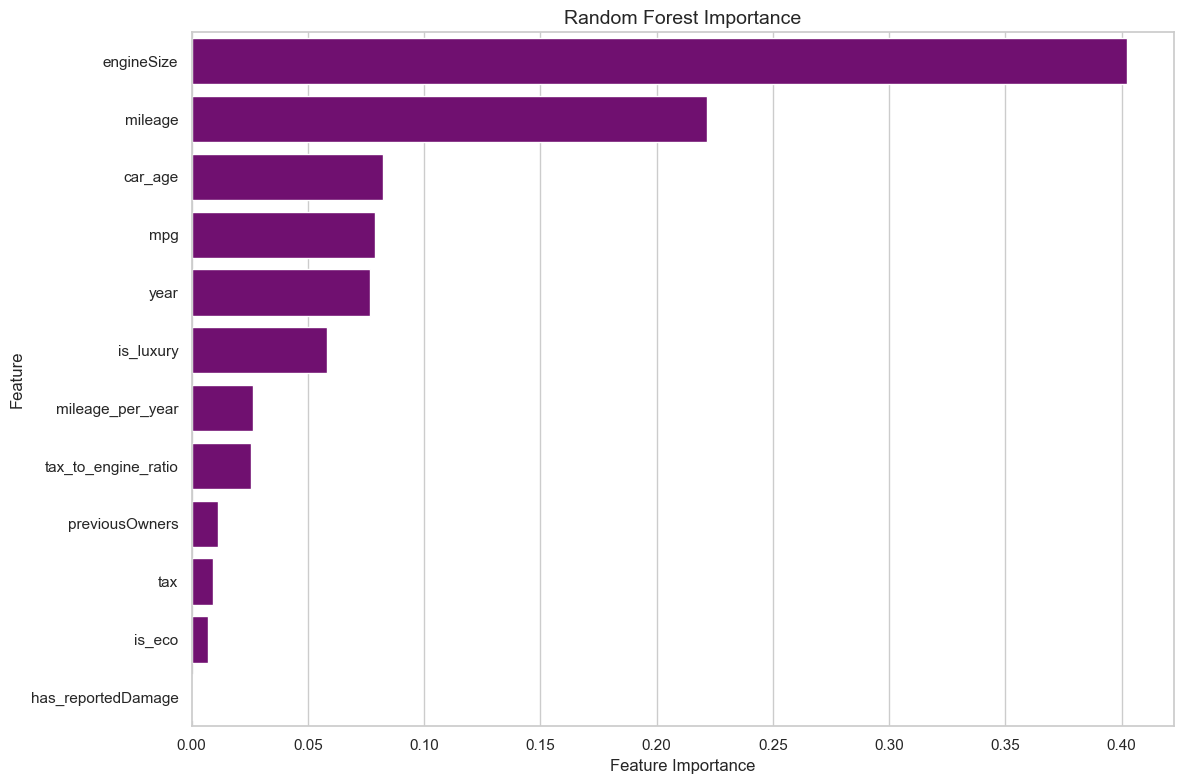

In [442]:

print("Shape do X_train[metric_features]:", X_train[metric_features].shape)

# Using a subset of data for Random Forest to speed up computation
sample_size = min(5000, len(X_train))   
X_sample = X_train_num_scaled.sample(n=sample_size, random_state=42)
y_sample = y_train.loc[X_sample.index]

# Random Forest Regressor
rf = RandomForestRegressor(
    criterion='squared_error',
    n_estimators=100,    
    max_depth=None,       
    random_state=42,
    n_jobs=-1             
)

rf.fit(X_sample, y_sample)

importances = rf.feature_importances_

# DataFrame with feature importances
imp_df = pd.DataFrame({
    'Feature': metric_features,
    'Importance': importances
})

# Sorting by importance
imp_df = imp_df.sort_values('Importance', ascending=False)

# Plotting top N features
top_n = 20
imp_top = imp_df.head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=imp_top,
    y='Feature',
    x='Importance',
    color='purple'
)
plt.title('Random Forest Importance', fontsize=14)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


Let us assign a threshold of importance as 0.05 (we can not look at high marginal decrease or a percentage consideration, as no valid conclusion would be reached). Consequently, according to Random Forest Squared Error criteria, we discard `has_reportedDamage`, `tax`, `is_eco`, `previousOwners`, `mileage_per_year` and `tax_to_engine_ratio`.

<hr>

### Numerical Data

| Predictor | Spearman | RFE LR | Lasso | Random Forest | What to do? (One possible way to "solve") | 
| --- | --- | --- |--- |---|---|
| year | Keep? | Keep | Keep | Keep | Include in the model |
| engineSize | Keep | Keep | Keep | Keep | Include in the model |
| is_luxury | Keep | Keep | Keep | Keep | Include in the model |
| is_eco | Keep | Keep | Keep | Discard | Include in the model |
| tax | Keep? | Keep | Discard | Discard | Discard |
| previousOwners | Keep | Discard | Discard | Discard | Discard |
| car_age | Keep? | Keep | Discard | Keep | Include in the model |
| mpg | Keep | Keep | Keep | Keep | Include in the model |
| mileage_per_year | Keep? | Keep | Keep | Discard | Discard |
| mileage | Keep? | Keep | Keep | Keep | Include in the model |
| tax_to_engine_ratio | Keep? | Keep | Keep | Discard | Include in the model |
| has_reportedDamage | Keep | Keep | Discard | Discard | Discard |


<hr>


### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| Brand | Keep |  
| model | Keep | 
| transmission | Keep | 
| fuelType | Keep|
| mileage_bin | Discard |


<hr>

<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
5. Machine Learning Model
</h2>

In [443]:
X_train_final.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'previousOwners',
       'has_reportedDamage', 'car_age', 'mileage_per_year', 'is_eco',
       'is_luxury', 'tax_to_engine_ratio', 'transmission_automatic',
       'transmission_manual', 'transmission_other', 'transmission_semiauto',
       'fuelType_diesel', 'fuelType_electric', 'fuelType_hybrid',
       'fuelType_other', 'fuelType_petrol', 'mileage_bin_0-10k',
       'mileage_bin_10k-50k', 'mileage_bin_50k-100k', 'Brand_Encoded',
       'model_Encoded'],
      dtype='object')

Selecting the desired features.

In [444]:
X_train_selected = X_train_final.drop(['mileage_per_year','has_reportedDamage','previousOwners','tax'], axis=1)
X_val_selected = X_val_final.drop(['mileage_per_year','has_reportedDamage','previousOwners','tax'], axis=1)
X_test_selected = X_test_final.drop(['mileage_per_year','has_reportedDamage','previousOwners','tax'], axis=1)

Data pre-processing transformation before model application.

In [445]:
X_test_selected.columns

Index(['year', 'mileage', 'mpg', 'engineSize', 'car_age', 'is_eco',
       'is_luxury', 'tax_to_engine_ratio', 'transmission_automatic',
       'transmission_manual', 'transmission_other', 'transmission_semiauto',
       'fuelType_diesel', 'fuelType_electric', 'fuelType_hybrid',
       'fuelType_other', 'fuelType_petrol', 'mileage_bin_0-10k',
       'mileage_bin_10k-50k', 'mileage_bin_50k-100k', 'Brand_Encoded',
       'model_Encoded'],
      dtype='object')

In [446]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:

param_grid_rf = {
    "n_estimators": [300, 500, 700],  
    "max_depth": [8, 12],              
    "min_samples_split": [20, 40], 
    "min_samples_leaf": [4, 8],    
    "max_features": ["sqrt", 0.25],    
    "bootstrap": [True], 
    "oob_score": [True]
}
# Manual grid search with holdout validation (RandomForestRegressor, MAE)
best_mae = float('inf') # Initialize to infinity for minimization
best_params_rf_reg = None
results_rf_reg = []

# Loop through all parameter combinations
for n_estimators in param_grid_rf['n_estimators']:
    for max_depth in param_grid_rf['max_depth']:
        for min_samples_split in param_grid_rf['min_samples_split']:
            for min_samples_leaf in param_grid_rf['min_samples_leaf']:
                
                # Create model with current hyperparameters
                model_rf_reg = RandomForestRegressor(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=42,
                    n_jobs=-1
                )
                
                # Train model with preprocessing
                trained_model, fitted_scaler, fill_values = run_model(
                    X_train_selected, y_train_log,
                    scaler=None,
                    model=model_rf_reg,
                    fill_method=None
                )
                
                # Evaluate on validation set (using train's preprocessing)
                val_mae = evaluate_model_rf_mae(X_val_selected, y_val_log, trained_model, fitted_scaler, fill_values)
                
                # Store results
                results_rf_reg.append({
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'val_mae': val_mae #(MAE)
                })
                
                # Track best parameters (MINIMIZE MAE)
                if val_mae < best_mae: #MINIMIZE MAE
                    best_mae = val_mae
                    best_params_rf_reg = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf
                    }


print("Grid Search Results (Holdout) - RandomForestRegressor")
print("="*65)
print(f"Best parameters: {best_params_rf_reg}")
print(f"Best validation score (MAE): {best_mae:.4f}")
print(f"\nTested {len(results_rf_reg)} combinations")



Grid Search Results (Holdout) - RandomForestRegressor
Best parameters: {'n_estimators': 700, 'max_depth': 12, 'min_samples_split': 20, 'min_samples_leaf': 4}
Best validation score (MAE): 0.0900

Tested 24 combinations


In [ ]:
# Create model with best hyperparameters
best_model_rf = RandomForestRegressor(**best_params_rf_reg)
best_model_rf.fit(X_train_selected,y_train_log)


,n_estimators,700
,criterion,'squared_error'
,max_depth,12
,min_samples_split,20
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [449]:
def compute_metrics(model, X, y, split):
    y_pred = model.predict(X)
    return {
        "split": split,
        "MAE": mean_absolute_error(y, y_pred),
        "MedAE": median_absolute_error(y, y_pred),
        "RMSE": root_mean_squared_error(y, y_pred),
        "MAPE": mean_absolute_percentage_error(y, y_pred),
        "R2": r2_score(y, y_pred),
    }

def compute_metrics_log(model, X, y, split):
    y_pred_log = model.predict(X)
    y_pred = np.exp(y_pred_log)
    return {
        "split": split,
        "MAE": mean_absolute_error(y, y_pred),
        "MedAE": median_absolute_error(y, y_pred),
        "RMSE": root_mean_squared_error(y, y_pred),
        "MAPE": mean_absolute_percentage_error(y, y_pred),
        "R2": r2_score(y, y_pred),
    }


In [ ]:


metrics_df = pd.DataFrame([
    compute_metrics_log(best_model_rf, X_train_selected, y_train, "train"),
    compute_metrics_log(best_model_rf, X_val_final,   y_val,   "val"),
]).set_index("split")

display(metrics_df)


,MAE,MedAE,RMSE,MAPE,R2
split,,,,,
train,1335.454427,850.246745,2372.833098,0.079848,0.941136
val,1503.115562,942.918168,2558.445560,0.090726,0.929495


In [348]:
y_test = best_model_rf.predict(X_test_final)
# y_test_original=np.exp(y_test_log)
y_test = pd.Series(y_test, name="price", index=X_test.index)
y_test.to_csv("y_test.csv",index=True)

In [81]:
from sklearn.neural_network import MLPRegressor

In [ ]:

param_grid_mlp= {
    "hidden_layer_sizes": [(30,), (20, 20)],
    "activation": ['relu', 'tanh'],
    "solver": ['adam'],
    "learning_rate_init": [0.001, 0.01],
    "alpha": [0.01, 0.1, 1.0],
    "early_stopping": [True],
    "max_iter": [300]         
}
# Manual grid search with holdout validation 
best_mae = float('inf') # Initialized to max (infinity) because we seek MINIMUM MAE
best_params_mlp_reg = None
results_mlp_reg = []

# Loop through all parameter combinations
for hidden_layer_sizes in param_grid_mlp['hidden_layer_sizes']:
    for activation in param_grid_mlp['activation']:
        for solver in param_grid_mlp['solver']:
            for learning_rate_init in param_grid_mlp['learning_rate_init']:
                for alpha in param_grid_mlp['alpha']:
                    for early_stopping in param_grid_mlp['early_stopping']:
                        for max_iter in param_grid_mlp['max_iter']:
                
                            # Create model with current hyperparameters
                            model_mlp_reg = MLPRegressor(
                                hidden_layer_sizes=hidden_layer_sizes,
                                activation=activation, 
                                solver=solver,
                                learning_rate_init=learning_rate_init,
                                alpha=alpha,
                                early_stopping=early_stopping,
                                max_iter=max_iter,
                                random_state=42,
                                n_iter_no_change=20
                            )
                
                            # Train model with preprocessing
                            # Nota: StandardScaler é tipicamente desnecessário para RF, aqui passamos None.
                            trained_model, fitted_scaler, fill_values = run_model(
                                X_train_selected, y_train,
                                scaler=None,
                                model=model_mlp_reg,
                                fill_method=None
                            )
                            
                            # Evaluate on validation set (using train's preprocessing)
                            # Assumimos que evaluate_model retorna o MAE
                            val_mae = evaluate_model_rf_mae(X_val_selected, y_val, trained_model, fitted_scaler, fill_values)
                            
                            # Store results
                            results_mlp_reg.append({
                                "hidden_layer_sizes": hidden_layer_sizes,
                                "activation": activation,
                                "solver": solver,
                                "learning_rate_init": learning_rate_init,
                                "alpha": alpha,
                                "early_stopping": early_stopping,
                                "max_iter": max_iter, 
                                'val_mae': val_mae # Métrica de validação (MAE)
                            })
                            
                            # Track best parameters (MINIMIZE MAE)
                            if val_mae < best_mae: # Lógica de MINIMIZAÇÃO
                                best_mae = val_mae
                                best_params_mlp_reg = {
                                    "hidden_layer_sizes": hidden_layer_sizes,
                                    "activation": activation,
                                    "solver": solver,
                                    "learning_rate_init": learning_rate_init,
                                    "alpha": alpha,
                                    "early_stopping": early_stopping,
                                    "max_iter": max_iter,
                    }


print("Grid Search Results (Holdout) - MLPRegressor")
print("="*65)
print(f"Best parameters: {best_params_mlp_reg}")
print(f"Best validation score (MAE): {best_mae:.4f}")
print(f"\nTested {len(results_mlp_reg)} combinations")

In [ ]:
best_model_mlp = MLPRegressor(**best_params_mlp_reg)

In [ ]:
metrics_df = pd.DataFrame([
    compute_metrics(best_model_mlp, X_train_selected, y_train, "train"),
    compute_metrics(best_model_mlp, X_val_final,   y_val,   "val"),
]).set_index("split")

display(metrics_df)

In [ ]:
model_mlp_reg_fixed = MLPRegressor(
hidden_layer_sizes=(30,),
activation='relu', 
solver='adam',
learning_rate_init=0.01,
alpha=0.01,
max_iter=300,
random_state=42,
n_iter_no_change=20
)
model_mlp_reg_fixed.fit(X_train_selected, y_train)

,loss,'squared_error'
,hidden_layer_sizes,"(30,)"
,activation,'relu'
,solver,'adam'
,alpha,0.01
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.01
,power_t,0.5
,max_iter,300
,shuffle,True


In [ ]:
metrics_df = pd.DataFrame([
    compute_metrics(model_mlp_reg_fixed, X_train_selected, y_train, "train"),
    compute_metrics(model_mlp_reg_fixed, X_val_final,   y_val,   "val"),
]).set_index("split")

display(metrics_df)

,MAE,MedAE,RMSE,MAPE,R2
split,,,,,
train,2876.338253,2028.616605,4298.643952,0.190635,0.806812
val,2916.295172,2071.283421,4205.795710,0.192627,0.809469


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

param_grid_gb = {
    'learning_rate': [0.01],                 
    'max_depth': [12, 15],                   
    'max_leaf_nodes': [511, 1023],         
    'min_samples_leaf': [1],                
    'l2_regularization': [0.01, 0.05],       
    'max_iter': [1500],  
}

# Manual grid search with holdout validation
best_mae = float('inf')
best_params_gb_reg = None
results_gb_reg = []

# Loop through all parameter combinations
for learning_rate in param_grid_gb['learning_rate']:
    for max_depth in param_grid_gb['max_depth']:
        for max_leaf_nodes in param_grid_gb['max_leaf_nodes']:
            for min_samples_leaf in param_grid_gb['min_samples_leaf']:
                for l2_regularization in param_grid_gb['l2_regularization']:
                    for max_iter in param_grid_gb['max_iter']:  # Loop do max_iter
                        
                        # Create model with current hyperparameters
                        model_gb_reg = HistGradientBoostingRegressor(
                            learning_rate=learning_rate,
                            max_depth=max_depth,
                            max_leaf_nodes=max_leaf_nodes,
                            min_samples_leaf=min_samples_leaf,
                            l2_regularization=l2_regularization,
                            max_iter=max_iter,
                            random_state=42,
                            early_stopping=False,
                        )
                        
                        # Train model with preprocessing
                        trained_model, fitted_scaler, fill_values = run_model(
                            X_train_selected, y_train_log,
                            scaler=None,
                            model=model_gb_reg,
                            fill_method=None
                        )
                        
                        # Evaluate on validation set
                        val_mae = evaluate_model_rf_mae(X_val_selected, y_val_log, trained_model, fitted_scaler, fill_values)
                        
                        # Store results
                        results_gb_reg.append({
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'max_leaf_nodes': max_leaf_nodes,
                            'min_samples_leaf': min_samples_leaf,
                            'l2_regularization': l2_regularization,
                            'max_iter': max_iter,
                            'val_mae': val_mae
                        })
                        
                        # Track best parameters
                        if val_mae < best_mae:
                            best_mae = val_mae
                            best_params_gb_reg = {
                                'learning_rate': learning_rate,
                                'max_depth': max_depth,
                                'max_leaf_nodes': max_leaf_nodes,
                                'min_samples_leaf': min_samples_leaf,
                                'l2_regularization': l2_regularization,
                                'max_iter': max_iter,
                            }
                        
                        print(f"Testing: lr={learning_rate}, depth={max_depth}, leaves={max_leaf_nodes}, "
                              f"min_samples={min_samples_leaf}, l2={l2_regularization}, iter={max_iter} -> MAE={val_mae:.2f}")

print("\n" + "="*70)
print("Grid Search Results - HistGradientBoostingRegressor")
print("="*70)
print(f"Best parameters: {best_params_gb_reg}")
print(f"Best validation MAE: {best_mae:.4f}")
print(f"\nTested {len(results_gb_reg)} combinations")



In [474]:
best_model_gb = HistGradientBoostingRegressor(**best_params_gb_reg)
best_model_gb.fit(X_train_final,y_train_log)

,loss,'squared_error'
,quantile,None
,learning_rate,0.03
,max_iter,100
,max_leaf_nodes,511
,max_depth,12
,min_samples_leaf,2
,l2_regularization,0.01
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'


In [475]:
metrics_df = pd.DataFrame([
    compute_metrics_log(best_model_gb, X_train_final, y_train, "train"),
    compute_metrics_log(best_model_gb, X_val_final,   y_val,   "val"),
]).set_index("split")

display(metrics_df)

,MAE,MedAE,RMSE,MAPE,R2
split,,,,,
train,1265.520009,808.018333,2142.904063,0.073944,0.951991
val,1451.730838,897.727498,2524.157225,0.086597,0.931372
